<a href="https://colab.research.google.com/github/CharLLCH/14S003027-software_class_task/blob/master/tf2_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.8MB 49.3MB/s 
     |████████████████████████████████| 450kB 75.3MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exis

import tensorflow as tf
print(tf.__version__)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
# guide use keras as high-level API to build models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# eexplore the data
train_image.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_image.shape

(10000, 28, 28)

<function matplotlib.pyplot.show>

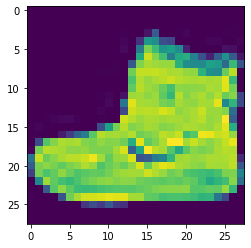

In [8]:
# preprocess the data
plt.figure()
plt.imshow(train_image[0])
plt.colorbar
plt.grid(False)
plt.show

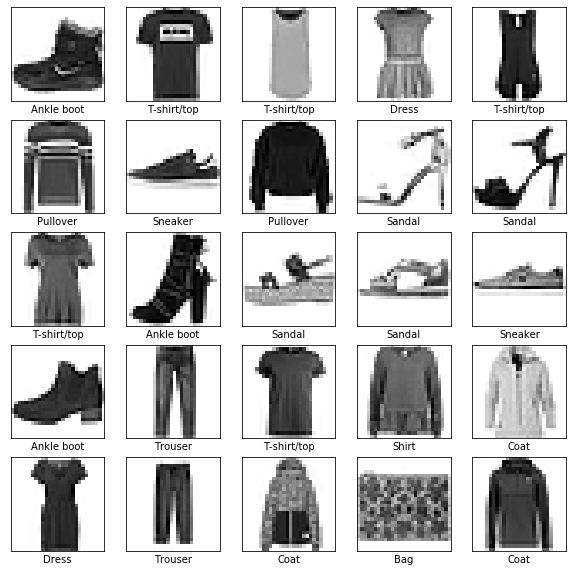

In [9]:
train_images = train_image / 255.0
test_images = test_image / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)), # conv2d to flatten array
  keras.layers.Dense(128, activation="relu"), # hidden layer
  keras.layers.Dense(10, activation="softmax") # output layer
])
# after set up, compile it of loss func, optimizer, metrics(Used to monitor the training and testing steps. )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4967 - accuracy: 0.8244
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3717 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3329 - accuracy: 0.8788
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3113 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2935 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2784 - accuracy: 0.8974
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2653 - accuracy: 0.9021
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2572 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2458 - accuracy: 0.9082
Epoch 10/10
6

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest acc: ', test_acc)

10000/10000 - 1s - loss: 0.3459 - accuracy: 0.8812

Test acc:  0.8812


In [13]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [0]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

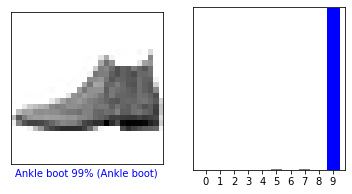

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

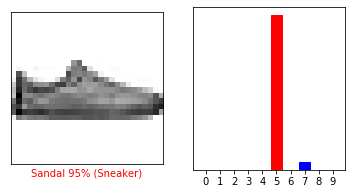

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

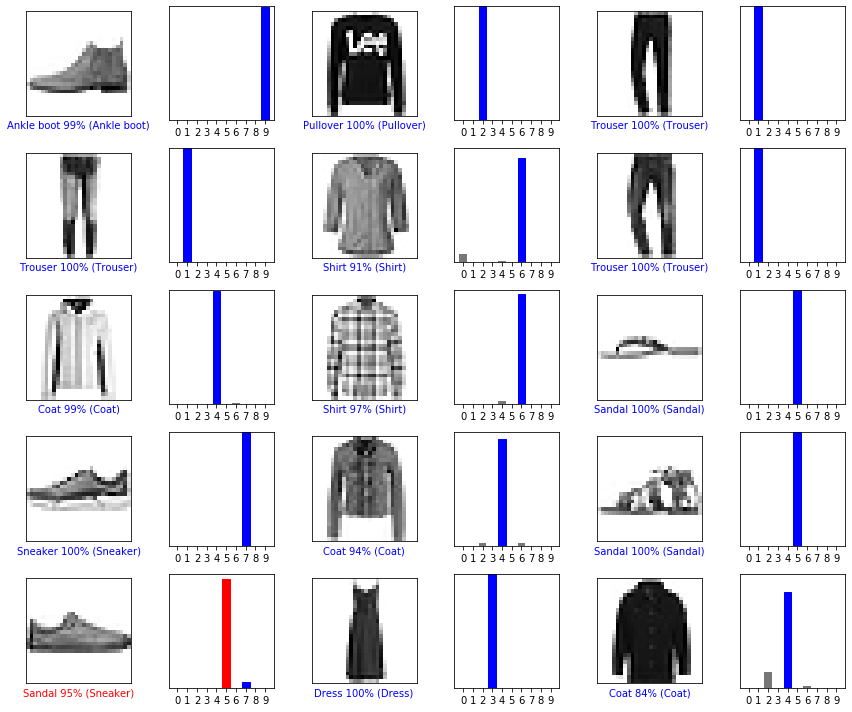

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[1.5288740e-07 9.4440150e-16 9.9933392e-01 9.0727583e-14 6.6355395e-04
  6.8715492e-13 2.4236695e-06 2.1659133e-18 2.3387666e-12 6.4329482e-14]]


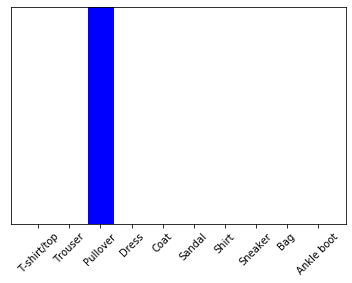

In [18]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list:
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)